<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [227]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [228]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [229]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-09-15 21:21:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-09-15 21:21:13 (133 MB/s) - 'loan_train.csv' saved [23101/23101]



### Load Data From CSV File


In [230]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv


--2022-09-15 21:21:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-09-15 21:21:15 (77.6 MB/s) - 'loan_train.csv' saved [23101/23101]

--2022-09-15 21:21:16--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67

In [231]:
train = pd.read_csv('loan_train.csv')
test = pd.read_csv('loan_test.csv')
print(train.shape)
print(test.shape)

df = train.append(test)

print(train.shape)
print(test.shape)
print(df.shape)

(346, 10)
(54, 10)
(346, 10)
(54, 10)
(400, 10)


### Convert to date time object


In [232]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [233]:
df['loan_status'].value_counts()

PAIDOFF       300
COLLECTION    100
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [234]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn

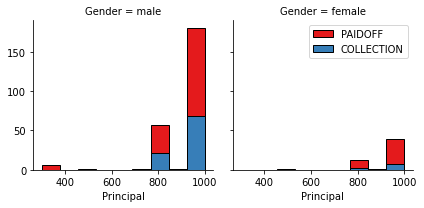

In [235]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

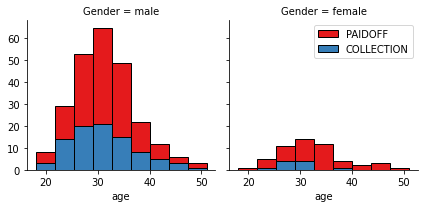

In [236]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


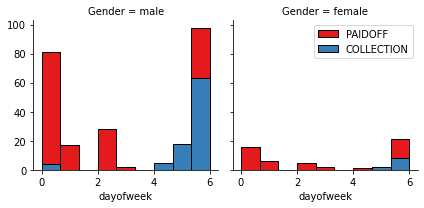

In [237]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [238]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [239]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.841270
        COLLECTION     0.158730
male    PAIDOFF        0.732938
        COLLECTION     0.267062
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [240]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [241]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.788462
                      COLLECTION     0.211538
High School or Below  PAIDOFF        0.715116
                      COLLECTION     0.284884
Master or Above       PAIDOFF        0.750000
                      COLLECTION     0.250000
college               PAIDOFF        0.773256
                      COLLECTION     0.226744
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [242]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [243]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above', 'Gender'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,0,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [244]:
X = Feature
X[0:5]


,Principal,terms,age,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,0,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,1,0,0,1


What are our lables?


In [245]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [246]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [247]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6
0,0.501302,0.920894,2.313350,-1.218389,-0.386556,1.151339,-0.868554
1,0.501302,0.920894,0.321944,-1.218389,2.586949,-0.868554,-0.868554
2,0.501302,-0.933255,-0.673759,-1.218389,-0.386556,-0.868554,1.151339
3,0.501302,0.920894,-0.507808,0.820756,-0.386556,-0.868554,1.151339
4,0.501302,0.920894,-0.341858,0.820756,-0.386556,-0.868554,1.151339


# Classification / Evaluation


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [248]:
import data_science as ds
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)  # Partir la información


<h3> JACCARD </h3>

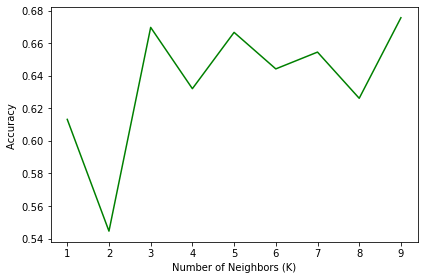

In [249]:
# Jaccard #

from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    k_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predicted=k_n.predict(X_test)
    le = preprocessing.LabelEncoder()
    y_predicted=le.fit_transform(y_predicted)
    y_test = le.fit_transform(y_test)
    mean_acc[n-1] = metrics.jaccard_score(y_test, y_predicted)

plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

<h3> F1 </h3>

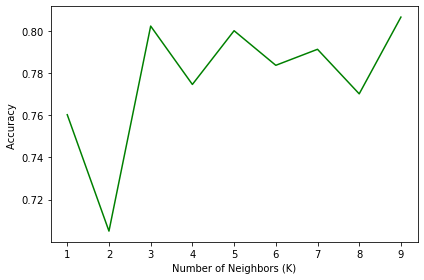

In [250]:
# f1 #

from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    k_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_predicted=k_n.predict(X_test)
    le = preprocessing.LabelEncoder()
    y_predicted=le.fit_transform(y_predicted)
    y_test = le.fit_transform(y_test)
    mean_acc[n-1] = metrics.f1_score(y_test, y_predicted)

plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Decision Tree


In [251]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

<h3> F1 </h3>

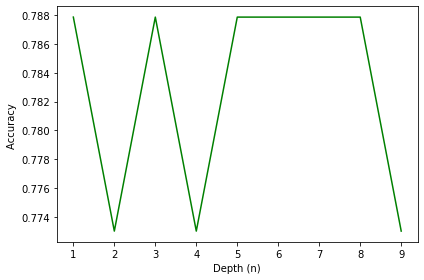

In [252]:
d = 10
mean_acc = np.zeros((d-1))
std_acc = np.zeros((d-1))

for n in range(1,d):
    
    #Train Model and Predict  
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    Tree.fit(X_train,y_train)
    y_predicted=Tree.predict(X_test)
    le = preprocessing.LabelEncoder()
    y_predicted=le.fit_transform(y_predicted)
    y_test = le.fit_transform(y_test)
    mean_acc[n-1] = metrics.f1_score(y_test, y_predicted)

plt.plot(range(1,d),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Depth (n)')
plt.tight_layout()
plt.show()

<h3> JACCARD </h3>

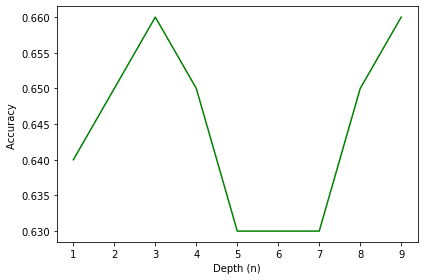

In [253]:
d = 10
mean_acc = np.zeros((d-1))
std_acc = np.zeros((d-1))

for n in range(1,d):
    
    #Train Model and Predict  
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    Tree.fit(X_train,y_train)
    y_predicted=Tree.predict(X_test)
    le = preprocessing.LabelEncoder()
    y_predicted=le.fit_transform(y_predicted)
    y_test = le.fit_transform(y_test)
    mean_acc[n-1] = metrics.jaccard_score(y_test, y_predicted)

plt.plot(range(1,d),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Depth (n)')
plt.tight_layout()
plt.show()

# Support Vector Machine


In [254]:
# Support Vector Machine
from sklearn import svm
sv_m = svm.SVC(kernel='rbf')
sv_m.fit(X_train, y_train) 
sv_m = svm.SVC(kernel='rbf')
sv_m.fit(X_train, y_train) 
y_predicted = sv_m.predict(X_test)

In [255]:
mean_acc_j = {}
mean_acc_f1 = {}

for n in ['poly', 'rbf', 'sigmoid']:
    
    #Train Model and Predict  
    sv_m = svm.SVC(kernel=n)
    sv_m.fit(X_train,y_train)
    y_predicted=sv_m.predict(X_test)
    le = preprocessing.LabelEncoder()
    y_predicted=le.fit_transform(y_predicted)
    y_test = le.fit_transform(y_test)
    mean_acc_j[n] = metrics.jaccard_score(y_test, y_predicted)
    mean_acc_f1[n] = metrics.jaccard_score(y_test, y_predicted)

print("Jaccard: ", mean_acc_j)
print("F1: ", mean_acc_f1)


Jaccard:  {'poly': 0.6964285714285714, 'rbf': 0.6909090909090909, 'sigmoid': 0.672566371681416}
F1:  {'poly': 0.6964285714285714, 'rbf': 0.6909090909090909, 'sigmoid': 0.672566371681416}


# Logistic Regression


In [256]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

mean_acc_j = []
mean_acc_f1 = []
mean_acc_log = []

for n in np.arange(0.01,0.30,0.01):
    
    #Train Model and Predict  
    LR = LogisticRegression(C=n, solver='liblinear').fit(X_train,y_train)
    y_predicted = LR.predict(X_test)
    y_predicted=LR.predict(X_test)
    le = preprocessing.LabelEncoder()
    y_predicted=le.fit_transform(y_predicted)
    y_test = le.fit_transform(y_test)
    mean_acc_j.append(metrics.jaccard_score(y_test, y_predicted))
    mean_acc_f1.append(metrics.f1_score(y_test, y_predicted))
    mean_acc_log.append(metrics.log_loss(y_test, y_predicted))

print("Jaccard: ",mean_acc_j)
print("F1: ",mean_acc_f1)
print("Log Loss: ",mean_acc_f1)

from statistics import mean

print("Jaccard mean: ",mean(mean_acc_j))
print("F1 mean: ",mean(mean_acc_f1))
print("Log Loss mean: ",mean(mean_acc_f1))


Jaccard:  [0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7027027027027027, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091, 0.7090909090909091]
F1:  [0.8253968253968254, 0.8253968253968254, 0.8253968253968254, 0.8253968253968254, 0.8253968253968254, 0.8253968253968254, 0.8253968253968254, 0.8253968253968254, 0.8253968253968254, 0.8253968253968254, 0.8297872340425533, 0.8297872340425533, 0.8297872340425533, 0.8297872340425533, 0.8297872340425533, 0.8297872340425533, 0.8297872340425533, 0.8297872340425533, 0.8297872340425533, 0.8297872340425533, 0.8

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.67    | 0.8        | NA      |
| Decision Tree      | 0.66    | 0.788        | NA      |
| SVM                | 0.696   | 0.696        | NA      |
| LogisticRegression | 0.7     | 0.828        | 0.828       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
